#**PROBLEMA DE NEGOCIO**


---




La necesidad de prever y optimizar el gasto de sus usuarios ha llevado a una empresa de comercio electrónico a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para desarrollar un modelo de machine learning que pueda predecir con precisión cuánto gastará un usuario al visitar dicho sitio web.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Importar correctamente y analizar y comprender el conjunto de datos proporcionado, realizar limpieza de datos, eliminar atributos que no aportan valor y manejar valores faltantes.

**2. Exploración y Feature Engineering:** Realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes, identificar variables llaves, codificación de variables categóricas y normalización/escalado de datos.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Linear Regression, Decision Tree Regressor, Random Forest Regressor, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como el error cuadrático medio (MSE), la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación (R²). Seleccionar el modelo con el mejor rendimiento para la predicción del gasto de los usuarios.

#**1. Configuración del Ambiente**


---




In [ ]:
!pip install wget
import wget
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import FunctionTransformer
from joblib import dump, load
global df_traffic, resultados, modelo, modelo_clasificacion

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=010850b195bb00d1f55e723c2acd890a96989d0f32c26f0405d885012e8dbde6
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


#**2. Preprocesamiento de Datos**


---


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  int64 
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  uint64
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 1.1+ MB


In [ ]:
df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})
preprocesamiento()
df_traffic.sample(5)

,channelGrouping,date,fullVisitorId,sessionId,visitId,referralPath,city,metro,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,campaign,source,medium,hits,pageviews,bounces,newVisits,transactionRevenue
6239,Organic Search,2017-07-11,353077134490370743,353077134490370743_1499799819,1499799819,NaN,not available in demo dataset,not available in demo dataset,1,2017-07-11 19:03:39,Chrome,Windows,False,desktop,(not set),google,organic,2,2,0,1,0.00
11768,Organic Search,2016-09-08,6671011279040141651,6671011279040141651_1473383947,1473383947,NaN,Seattle,Seattle-Tacoma WA,1,2016-09-09 01:19:07,Safari,iOS,True,mobile,(not set),google,organic,43,35,0,1,31.49
4556,Social,2016-11-04,1892819876107748233,1892819876107748233_1478262451,1478262451,/yt/about/pt-BR/,not available in demo dataset,not available in demo dataset,1,2016-11-04 12:27:31,Safari,Macintosh,False,desktop,(not set),youtube.com,referral,2,2,0,1,0.00
6849,Organic Search,2017-07-02,957987157583681083,957987157583681083_1499040560,1499040560,NaN,Seattle,Seattle-Tacoma WA,1,2017-07-03 00:09:20,Chrome,Android,True,mobile,(not set),google,organic,2,2,0,1,0.00
12092,Organic Search,2017-04-09,770439819992389431,0770439819992389431_1491794927,1491794927,NaN,Hong Kong,(not set),1,2017-04-10 03:28:47,Chrome,iOS,True,tablet,(not set),google,organic,2,2,0,1,0.00


In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   channelGrouping     12283 non-null  object        
 1   date                12283 non-null  datetime64[ns]
 2   fullVisitorId       12283 non-null  object        
 3   sessionId           12283 non-null  object        
 4   visitId             12283 non-null  object        
 5   referralPath        4490 non-null   object        
 6   city                12283 non-null  object        
 7   metro               12283 non-null  object        
 8   visitNumber         12283 non-null  int64         
 9   visitStartTime      12283 non-null  datetime64[ns]
 10  browser             12283 non-null  object        
 11  operatingSystem     12283 non-null  object        
 12  isMobile            12283 non-null  bool          
 13  deviceCategory      12283 non-null  object    

#**3. Exploración y Feature Engineering**


---


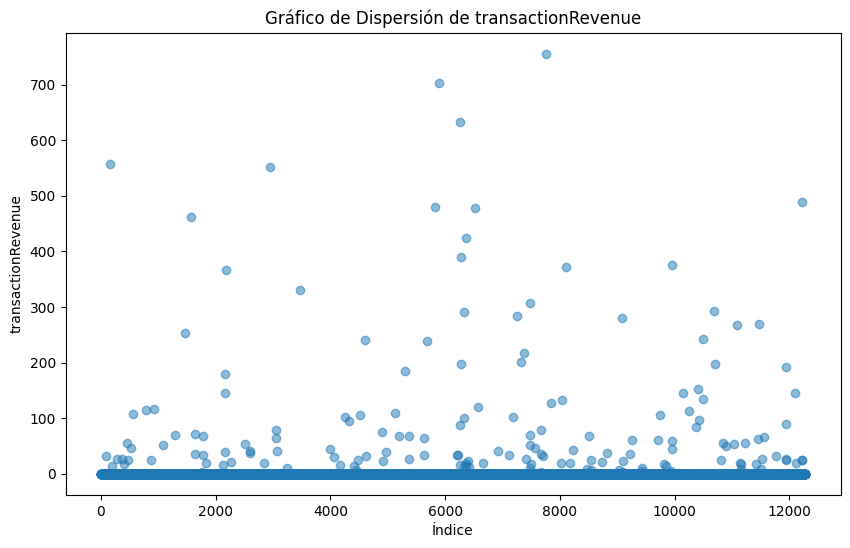

In [ ]:
# Grafico de dispersión (antes)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_traffic['transactionRevenue'])), df_traffic['transactionRevenue'], alpha=0.5)
plt.title('Gráfico de Dispersión de transactionRevenue')
plt.xlabel('Índice')
plt.ylabel('transactionRevenue')
plt.show()

<Axes: ylabel='transactionRevenue'>

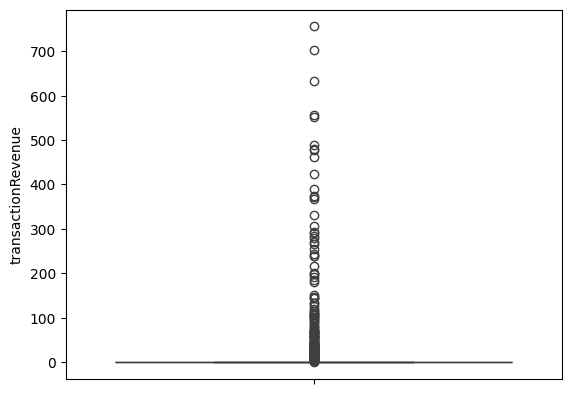

In [ ]:
sns.boxplot(df_traffic.transactionRevenue)

In [ ]:
df_traffic.describe()

,visitNumber,hits,pageviews,bounces,newVisits,transactionRevenue
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,1.923390,4.637141,3.871286,0.502483,0.768949,1.447871
std,5.878228,10.136882,7.273662,0.500014,0.421522,20.893896
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,195.000000,471.000000,305.000000,1.000000,1.000000,755.630000


In [ ]:
conteo = df_traffic['transactionRevenue'].value_counts().sort_values(ascending=False)
conteo

0.00      12119
33.59         3
19.19         3
13.59         3
4.99          2
          ...  
7.99          1
269.55        1
62.05         1
8.48          1
25.24         1
Name: transactionRevenue, Length: 147, dtype: int64

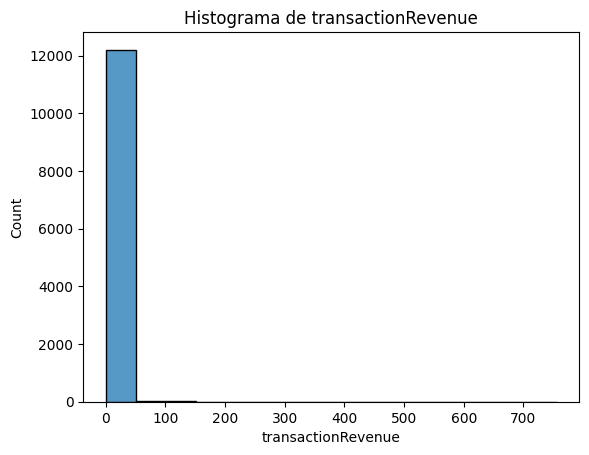

In [ ]:
#Histograma (antes)
ax = sns.histplot(data=df_traffic, x='transactionRevenue', kde=False)
ax.set_title('Histograma de transactionRevenue')
ax.set_xlabel('transactionRevenue');

In [ ]:
feature_engineering()
df_traffic.sample(5)

,channelGrouping,referralPath,city,metro,visitNumber,browser,operatingSystem,isMobile,deviceCategory,campaign,source,medium,hits,pageviews,bounces,newVisits,transactionRevenue,month,quarterMonth,day,weekday,time_range
8192,2,197,295,52,1,18,11,True,1,0,0,0,1,1,1,1,0.00,9,2,23,4,4
7167,2,197,182,32,1,18,11,True,1,0,0,0,1,1,1,1,0.00,2,2,19,6,0
6338,6,0,16,3,1,5,6,False,0,0,48,6,36,27,0,1,13.59,12,1,15,3,3
2340,7,129,295,52,1,3,1,True,1,0,75,6,5,3,0,1,0.00,2,2,17,4,3
12275,7,164,246,0,1,5,1,True,1,0,75,6,1,1,1,1,0.00,1,0,4,2,4


In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     12283 non-null  int64  
 1   referralPath        12283 non-null  int64  
 2   city                12283 non-null  int64  
 3   metro               12283 non-null  int64  
 4   visitNumber         12283 non-null  int64  
 5   browser             12283 non-null  int64  
 6   operatingSystem     12283 non-null  int64  
 7   isMobile            12283 non-null  bool   
 8   deviceCategory      12283 non-null  int64  
 9   campaign            12283 non-null  int64  
 10  source              12283 non-null  int64  
 11  medium              12283 non-null  int64  
 12  hits                12283 non-null  int64  
 13  pageviews           12283 non-null  int64  
 14  bounces             12283 non-null  int64  
 15  newVisits           12283 non-null  int64  
 16  tran

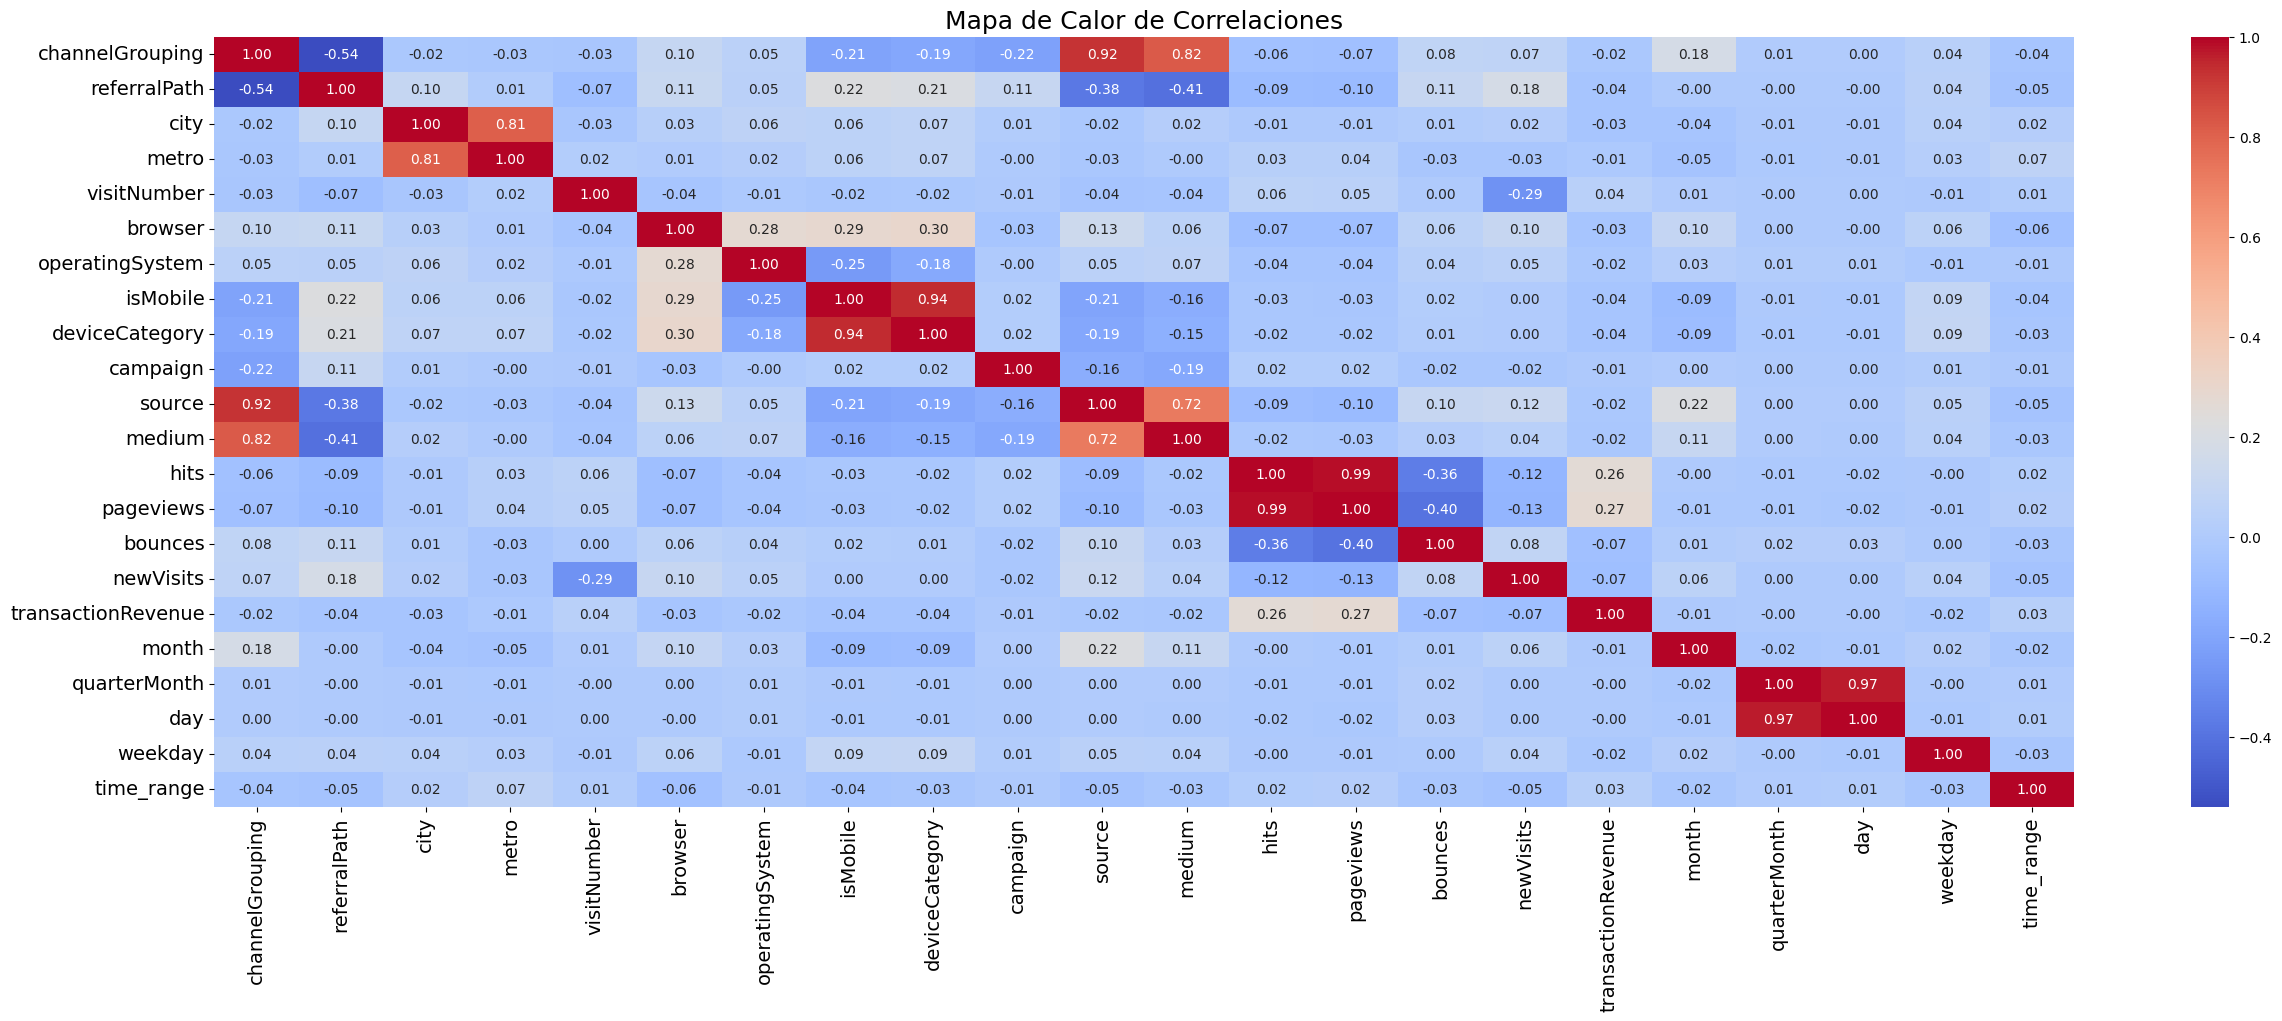

In [ ]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_traffic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

#**4. Construcción de Modelos**


---


In [ ]:
crea_modelos()
for i, model in enumerate(resultados['Model']):
    print('-------------------------------')
    print(f"Modelo: {model}")
    print(f"R-cuadrado (R²): {resultados['R2'][i]}")
    print(f"Error cuadrático medio (MSE): {resultados['MSE'][i]}")
    print(f"Raíz del error cuadrático medio (RMSE): {resultados['RMSE'][i]}")
    print('-------------------------------')

Training until validation scores don't improve for 500 rounds
Did not meet early stopping. Best iteration is:
[699]	valid_0's rmse: 14.5269
-------------------------------
Modelo: Regresión Lineal
R-cuadrado (R²): 27.568435610639252
Error cuadrático medio (MSE): 276.52011601208096
Raíz del error cuadrático medio (RMSE): 16.62889401048912
-------------------------------
-------------------------------
Modelo: Random Forest
R-cuadrado (R²): 37.60157434910354
Error cuadrático medio (MSE): 238.21686091445994
Raíz del error cuadrático medio (RMSE): 15.434275522824514
-------------------------------
-------------------------------
Modelo: LightGBM
R-cuadrado (R²): 45.33869593029468
Error cuadrático medio (MSE): 208.67905132457332
Raíz del error cuadrático medio (RMSE): 14.445727787985392
-------------------------------
-------------------------------
Modelo: XGBoost
R-cuadrado (R²): 41.81389067868423
Error cuadrático medio (MSE): 222.13560946069006
Raíz del error cuadrático medio (RMSE): 14.

#**5. Evaluación y Selección del Modelo**


---


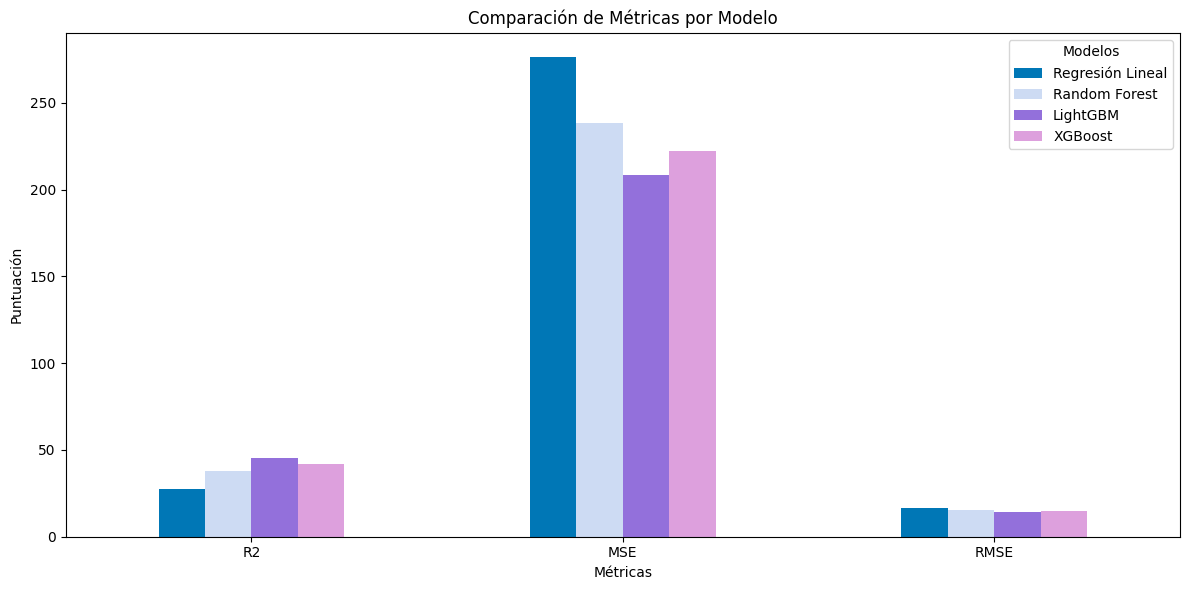

In [ ]:
visualiza_resultados()

#**6. Producción**


---


In [ ]:
#Cargar base de prueba y ejecutar normalización utilizada en nuestro modelo
df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_test.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})
preprocesamiento()
feature_engineering()

#Cargar el modelo entrenado
wget.download('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/modelo.joblib', 'modelo.joblib')
modelo = load('modelo.joblib')
wget.download('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/modelo_clasificacion.joblib', 'modelo_clasificacion.joblib')
modelo_clasificacion = load('modelo_clasificacion.joblib')

#Pronosticar con la nueva base
X = df_traffic.drop('transactionRevenue',axis=1)
X['clasificacion'] = modelo_clasificacion.predict(X)
y = df_traffic.transactionRevenue.copy()
predictions = modelo.predict(xgb.DMatrix(X))
predictions[predictions < 1] = 0

#Genera algunas métricas de evaluación de los pronosticos
r2 = r2_score(y, predictions)*100
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
print(f"R-cuadrado (R²): {r2}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

R-cuadrado (R²): 27.66225465437313
Error cuadrático medio (MSE): 281.0448336236674
Raíz del error cuadrático medio (RMSE): 16.76439183578299


In [ ]:
#Ejemplos de los pronósticos
df_resultados = pd.DataFrame({
    'transactionRevenue': y,
    'predictions': predictions
})
df_resultados[df_resultados.transactionRevenue>0].sample(10)

,transactionRevenue,predictions
656,192.87,184.523697
657,27.18,131.177628
655,23.97,0.000000
192,269.55,23.365696
276,66.96,3.251449
820,144.97,12.033607
832,19.19,18.876350
939,489.20,376.300415
654,89.99,0.000000
948,23.95,22.540262
